In [1]:
import numpy as np
from scipy import sparse
import os

In [2]:
# change the directory to the root folder
os.chdir(os.path.dirname(os.getcwd()))

# Load the necessary libraries

In [41]:
%load_ext autoreload
%autoreload 2

from src.common.utils import save_model, load_model, save_cv_results, load_cv_results, plot_leanring_curve, save_plot, save_metrics, load_metrics,format_cv_results, plot_complexity_curve,
from src.dataset1_tabular.models import SVMModel

# set the global plot style
set_global_plot_style(tick_size=12, label_size=14, title_size=16, legend_size=14,figsize=(12, 6))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Global plot style set successfully!


# Load the dataset

In [4]:
X_train = sparse.load_npz('data/dataset1/processed/X_train.npz')
X_test = sparse.load_npz('data/dataset1/processed/X_test.npz')
y_train = np.load('data/dataset1/processed/y_train.npy')
y_test = np.load('data/dataset1/processed/y_test.npy')

# Train the SVM Model

In [5]:
dataset = 'dataset1'
model_name = 'svm'
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 0.01],
}

In [ ]:
svm_model = SVMModel(X_train, y_train,X_test, y_test,cv=5,param_grid=param_grid)
# train
svm_model.train()

In [7]:
# save model
save_model(svm_model.best_model, 'results/model_outputs', model_name, dataset)
# save cv results
save_cv_results(svm_model.cv_results, 'results/model_outputs', model_name, dataset)

Model saved successfully at results/model_outputs/svm_dataset1.joblib
Cross-validation results saved successfully at results/model_outputs/svm_dataset1_cv_results.pkl


# Evaluate the model

Accuracy: 0.911
Precision: 0.673
Recall: 0.447
f1-score: 0.537


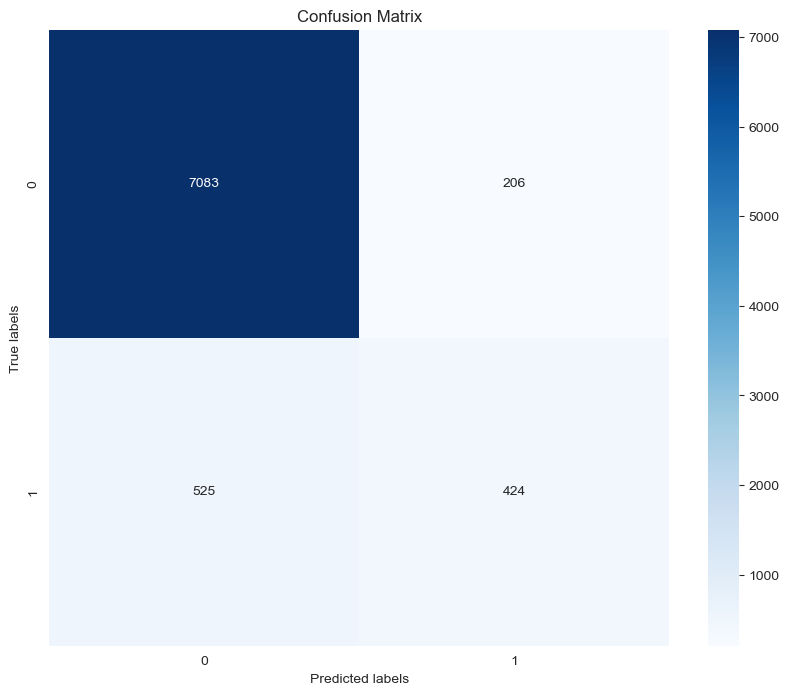

Metrics saved successfully at results/model_outputs/svm_dataset1_metrics.json


In [8]:
eval_results = svm_model.evaluate()
save_metrics(eval_results, 'results/model_outputs', model_name, dataset)

# Analysis

In [9]:
best_model = load_model('results/model_outputs', model_name, dataset)
metrics = load_metrics('results/model_outputs', model_name, dataset)

print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/model_outputs/svm_dataset1.joblib
Metrics loaded successfully from results/model_outputs/svm_dataset1_metrics.json
the best model params: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
the metrics of testing dataset: {'accuracy': 0.9112648701141054, 'precision': 0.6730158730158731, 'recall': 0.44678609062170704, 'f1': 0.5370487650411652}


# Learning Curve

In [10]:
best_model = load_model('results/model_outputs', model_name, dataset)

Model loaded successfully from results/model_outputs/svm_dataset1.joblib


[learning_curve] Training set sizes: [  263  2636  5272 10544 15816 21088 26360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  35 | elapsed:   13.1s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   39.8s finished


Plot saved successfully at results/figures/svm_learning_curve_dataset1.png
Plot saved successfully at results/figures/svm_fit_time_dataset1.png


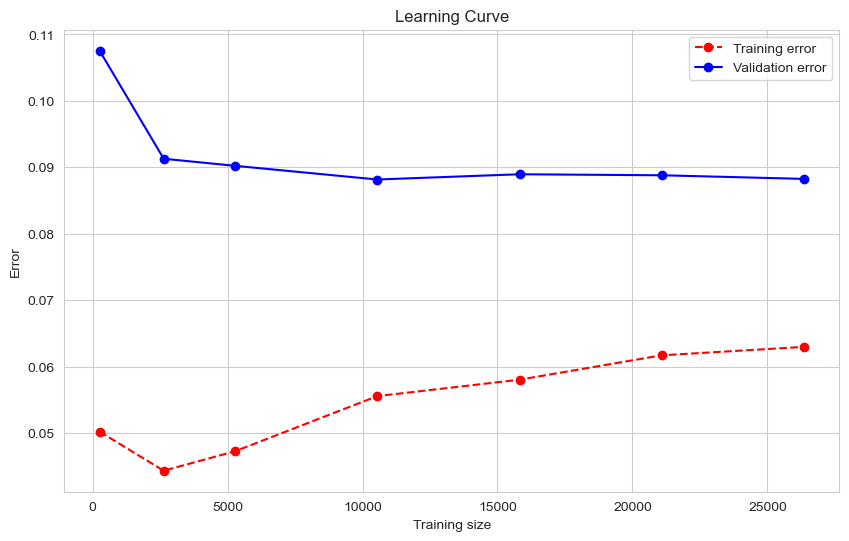

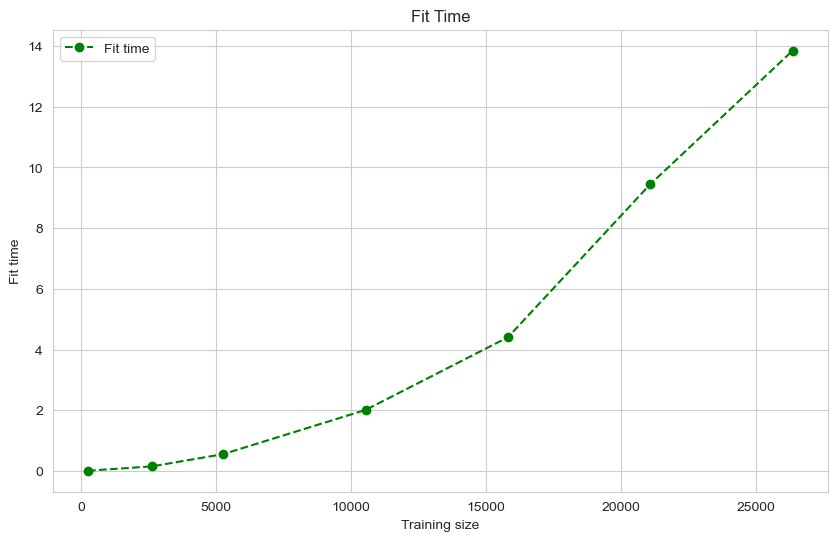

In [11]:
lc_plt, fit_plt = plot_leanring_curve(best_model, X_train, y_train, cv = 5, train_size=[0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1])
save_plot(lc_plt, 'results/figures', model_name,'learning_curve', dataset)
save_plot(fit_plt, 'results/figures', model_name,'fit_time', dataset)

# Complexity Curve

In [12]:
cv_results = load_cv_results('results/model_outputs', model_name, dataset)

Cross-validation results loaded successfully from results/model_outputs/svm_dataset1_cv_results.pkl


In [13]:
cv_results_df = format_cv_results(cv_results)
cv_results_df

,C,degree,gamma,kernel,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,0.1,2,scale,linear,13.790015,0.487954,2.199983,0.074231,0.906039,0.001293,0.906487,0.000344,0.093513,0.093961
1,0.1,2,scale,rbf,14.179594,0.566444,2.667269,0.611847,0.907193,0.001122,0.909977,0.000529,0.090023,0.092807
2,0.1,2,scale,poly,12.340035,0.211214,2.260979,0.086417,0.906009,0.001105,0.908187,0.000707,0.091813,0.093991
3,0.1,2,auto,linear,14.190383,2.874583,2.294507,0.340593,0.906039,0.001293,0.906487,0.000344,0.093513,0.093961
4,0.1,2,auto,rbf,14.349952,0.125618,2.518535,0.106093,0.905524,0.001209,0.906222,0.000612,0.093778,0.094476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,100.0,4,0.1,rbf,57.495187,2.446040,2.362566,0.061606,0.889044,0.002164,0.995797,0.000126,0.004203,0.110956
140,100.0,4,0.1,poly,130.501362,0.738364,1.735919,0.047322,0.880698,0.002786,0.998551,0.000121,0.001449,0.119302
141,100.0,4,0.01,linear,655.186603,30.992814,1.561675,0.023415,0.906313,0.001389,0.906730,0.000367,0.093270,0.093687
142,100.0,4,0.01,rbf,27.784573,0.273364,2.070955,0.037564,0.911199,0.001817,0.934886,0.001014,0.065114,0.088801


In [37]:
param_grid

{'kernel': ['linear', 'rbf', 'poly'],
 'C': [0.1, 1, 10, 100],
 'degree': [2, 3, 4],
 'gamma': ['scale', 'auto', 0.1, 0.01]}

In [36]:
best_model.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Gamma impact for RBF kernel

Plot saved successfully at results/figures/svm_complexity_curve_rbf_C_0.1_degree_2_dataset1.png
Plot saved successfully at results/figures/svm_complexity_curve_rbf_C_1_degree_2_dataset1.png
Plot saved successfully at results/figures/svm_complexity_curve_rbf_C_10_degree_2_dataset1.png
Plot saved successfully at results/figures/svm_complexity_curve_rbf_C_100_degree_2_dataset1.png


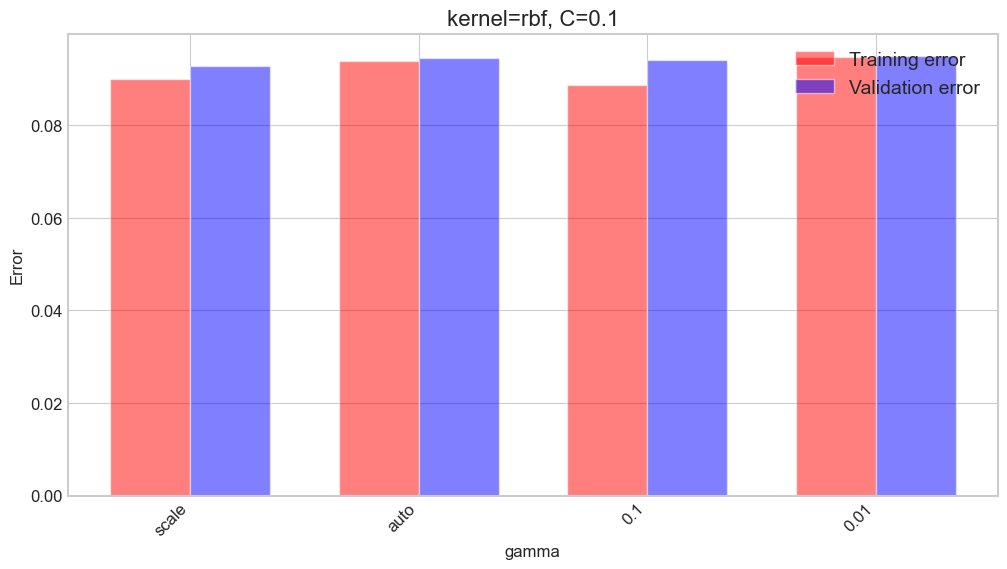

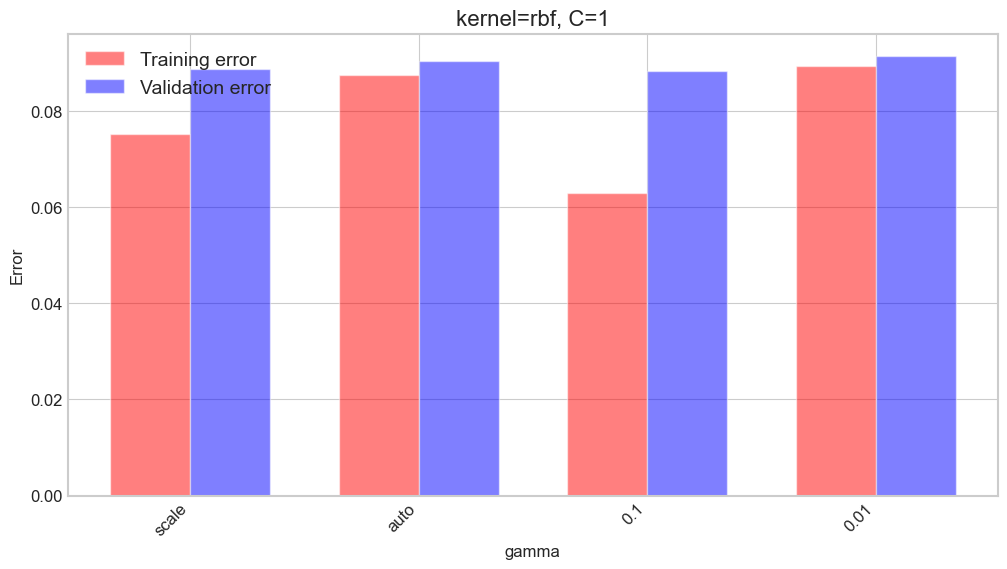

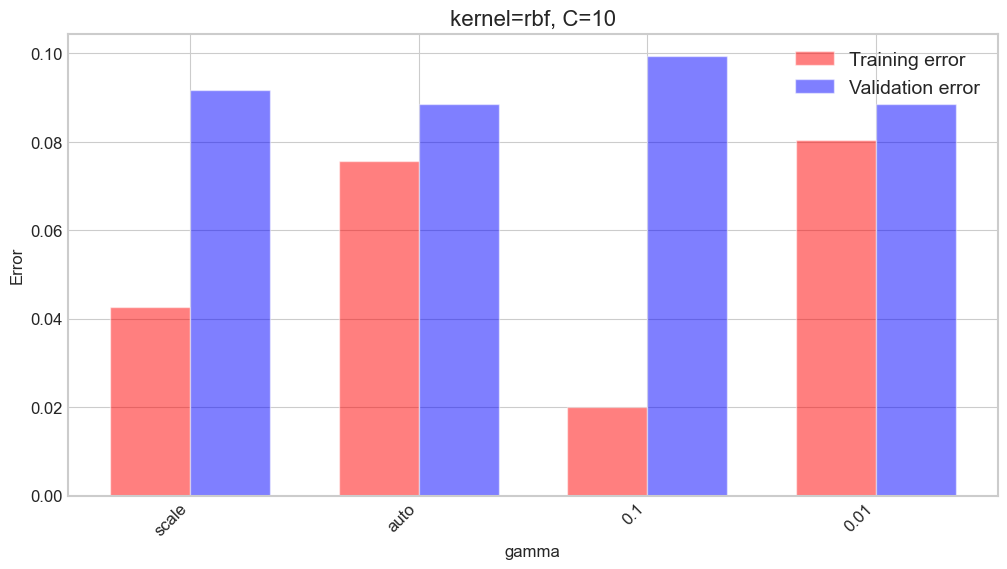

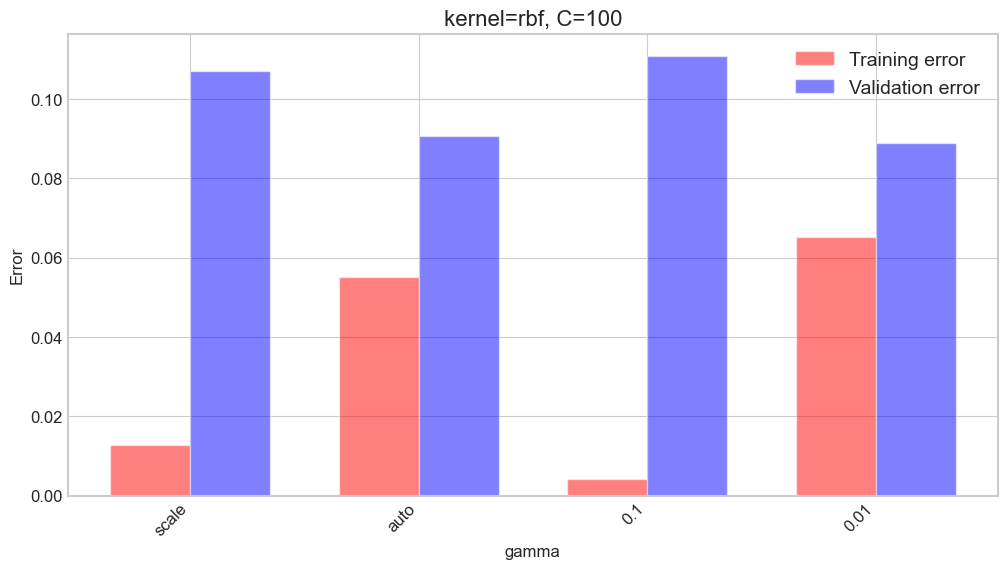

In [43]:
# observer the gamma impact for rbf kernel
for kernel in ['rbf']:
    for C in param_grid['C']:
       for degree in [2]:
            sub_table = cv_results_df[(cv_results_df['kernel'] == kernel)\
                                        & (cv_results_df['C'] == C)\
                                        & (cv_results_df['degree'] == degree)]
            plt = plot_complexity_curve(sub_table, 'gamma',title=f'kernel={kernel}, C={C}')
            plt_name = f'complexity_curve_{kernel}_C_{C}_degree_{degree}'
            save_plot(plt, 'results/figures', model_name, plt_name, dataset)

## C impact for RBF kernel

Plot saved successfully at results/figures/svm_complexity_curve_rbf_gamma_0.1_degree_2_dataset1.png


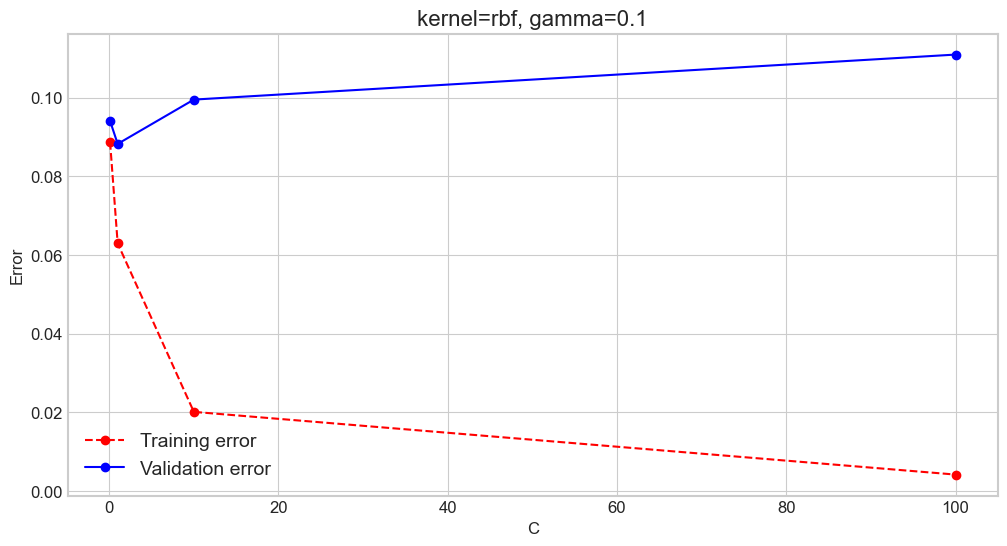

In [44]:
# observer the C impact for rbf kernel
for kernel in ['rbf']:
    for gamma in [0.1]:
        for degree in [2]:
            sub_table = cv_results_df[(cv_results_df['kernel'] == kernel)\
                                        & (cv_results_df['gamma'] == gamma)\
                                        & (cv_results_df['degree'] == degree)]
            plt = plot_complexity_curve(sub_table, 'C',title=f'kernel={kernel}, gamma={gamma}')
            plt_name = f'complexity_curve_{kernel}_gamma_{gamma}_degree_{degree}'
            save_plot(plt, 'results/figures', model_name, plt_name, dataset)

# kernel impact

Plot saved successfully at results/figures/svm_complexity_curve_C_1_gamma_0.1_degree_2_dataset1.png


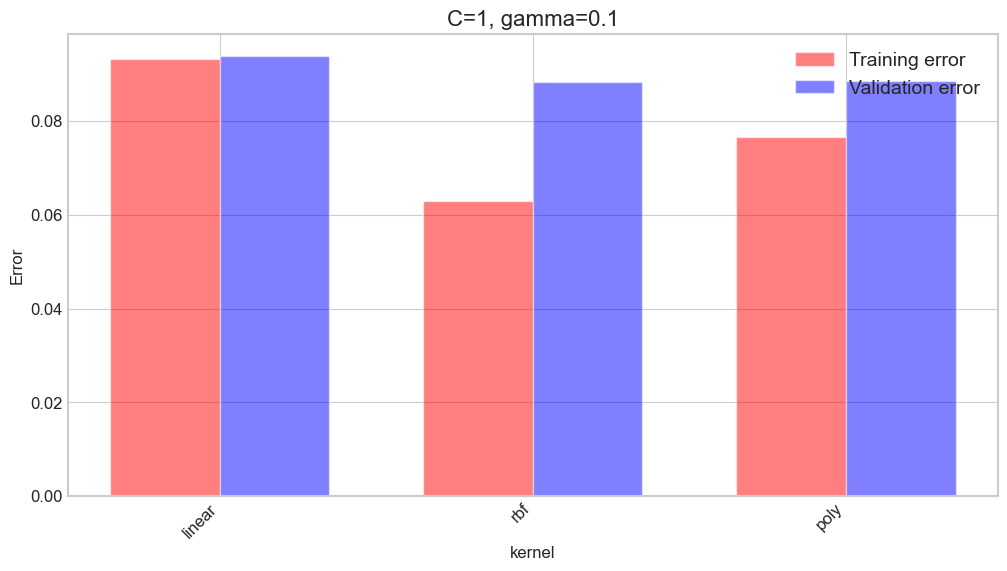

In [45]:
for C in [1]:
    for gamma in [0.1]:
        for degree in [2]:
            sub_table = cv_results_df[(cv_results_df['C'] == C)\
                                        & (cv_results_df['gamma'] == gamma)\
                                        & (cv_results_df['degree'] == degree)]
            plt = plot_complexity_curve(sub_table, 'kernel',title=f'C={C}, gamma={gamma}')
            plt_name = f'complexity_curve_C_{C}_gamma_{gamma}_degree_{degree}'
            save_plot(plt, 'results/figures', model_name, plt_name, dataset)